In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [60]:
#Load data
cts=['3.1','3.2','3.3','3.4','3.5','3.6','4.1','4.2','4.3','4.4','4.5','4.6','4.7','4.8','4.9','4.10']
sol_cts=['3.1','3.2','3.3','3.4','3.5','3.6']
closed_cts=['4.1','4.2','4.3','4.4','4.5','4.6','4.7','4.8','4.9','4.10']
prot_data=pd.read_csv('RepeatsDB_results\\prot_results.csv')
suppl_data=pd.read_csv('repeatsdb_unique_updated.csv',dtype={'ct':str})

In [61]:
prot_data=prot_data.merge(suppl_data,left_on='pdb_id',right_on='pdb',how='left')
prot_data=prot_data[prot_data['ct'].isin(cts)]

In [26]:
prot_data.head()

,Unnamed: 0,pdb_id,chain,curvature_mean,curvature_std,twist_mean,twist_std,pitch_mean,pitch_std,handendness_mean,...,ctfc,units,units_num,units_avg,insertions,insertions_num,pdb,ct,start,end
0,0,1a0rB,B,0.910817,0.074217,0.203726,0.122241,0.151370,0.066462,0.00,...,4.4.1.1,"55_98,99_142,143_183,184_227,228_271,272_314,3...",7,39.86,NaN,0,1a0rB,4.4,55,340
1,1,1a0tP,P,0.675563,0.387177,0.244261,0.188041,0.185186,0.140832,-0.25,...,4.2.0.0,"73_133,134_179,180_220,221_255,256_303,304_350...",9,44.67,"100_104,193_203,450_455",3,1a0tP,4.2,73,483
2,2,1a12A,A,0.891883,0.053569,0.236965,0.161386,0.088129,0.054955,0.00,...,4.4.1.3,"35_87,88_150,151_192,193_260,261_314,315_365,3...",7,53.71,208_224,1,1a12A,4.4,35,417
3,3,1a17A,A,0.639499,0.007201,0.651882,0.052589,0.282825,0.148078,1.00,...,3.3.0.0,"22_60,61_94,95_128",3,34.67,NaN,0,1a17A,3.3,22,128
4,4,1a18A,A,1.295209,0.122102,1.101589,0.562994,1.004403,0.751431,-0.50,...,4.2.1.2,"1_46,47_65,66_88,89_110,111_131",5,25.20,"16_23,27_34",2,1a18A,4.2,1,131


# Protein level results

## Correlations

In [81]:
prot_data.corr(numeric_only=True)

,Unnamed: 0,curvature_mean,curvature_std,twist_mean,twist_std,pitch_mean,pitch_std,handendness_mean,handedness_std,TMscore_mean,TMscore_std,units_num,units_avg,insertions_num,start,end
Unnamed: 0,1.000000,-0.085408,-0.008431,-0.150393,-0.053185,-0.107748,-0.030294,0.045580,-0.001192,0.131405,0.044659,0.142252,0.134556,0.066486,0.070956,0.168717
curvature_mean,-0.085408,1.000000,0.447407,0.612469,0.150877,0.573946,0.163393,0.006298,0.183831,0.110753,-0.263839,-0.303577,0.330945,-0.006107,-0.003964,-0.060627
curvature_std,-0.008431,0.447407,1.000000,0.288062,0.402422,0.403876,0.426070,-0.068800,0.205264,-0.260734,-0.101276,-0.065902,0.151690,0.228028,-0.072926,-0.042175
twist_mean,-0.150393,0.612469,0.288062,1.000000,0.370662,0.814886,0.328676,0.025334,-0.056915,-0.081918,-0.343565,-0.326528,0.087343,-0.037365,0.019530,-0.109491
twist_std,-0.053185,0.150877,0.402422,0.370662,1.000000,0.291407,0.720960,-0.093123,0.208840,-0.422815,-0.105611,-0.041668,0.013874,0.135366,-0.067663,-0.053915
pitch_mean,-0.107748,0.573946,0.403876,0.814886,0.291407,1.000000,0.362789,0.032037,0.003043,-0.014059,-0.285116,-0.308334,0.222697,-0.016546,-0.040020,-0.130110
pitch_std,-0.030294,0.163393,0.426070,0.328676,0.720960,0.362789,1.000000,-0.078775,0.161459,-0.406416,-0.090838,-0.042603,0.011177,0.139261,-0.071338,-0.057411
handendness_mean,0.045580,0.006298,-0.068800,0.025334,-0.093123,0.032037,-0.078775,1.000000,-0.095766,0.229160,-0.001225,0.076311,-0.001867,-0.124116,-0.040349,-0.008954
handedness_std,-0.001192,0.183831,0.205264,-0.056915,0.208840,0.003043,0.161459,-0.095766,1.000000,-0.169402,0.031060,0.116764,0.191034,0.136416,-0.009411,0.100133
TMscore_mean,0.131405,0.110753,-0.260734,-0.081918,-0.422815,-0.014059,-0.406416,0.229160,-0.169402,1.000000,0.234469,-0.019630,0.365910,-0.181820,0.067899,0.121881


- Standard deviations have a negative correlation with the mean TM-score
- Number of units has no correlation with standard deviations
- Curvature is strongly correlated with twist and pitch
- Twist is very strongly correlated with pitch

## Distributions

#### Curvature

<Axes: title={'center': 'curvature_mean'}, xlabel='ct'>

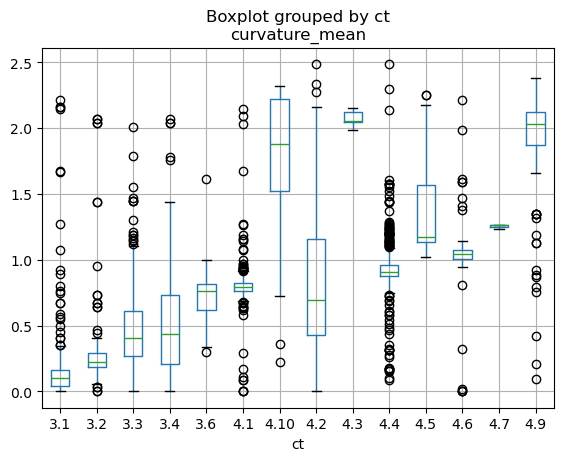

In [63]:
prot_data.boxplot(column='curvature_mean',by='ct')

<Axes: title={'center': 'curvature_std'}, xlabel='ct'>

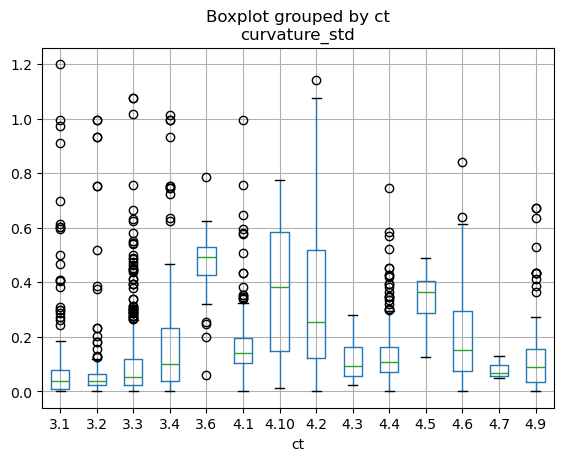

In [64]:
prot_data.boxplot(column='curvature_std',by='ct')

#### Twist

<Axes: title={'center': 'twist_mean'}, xlabel='ct'>

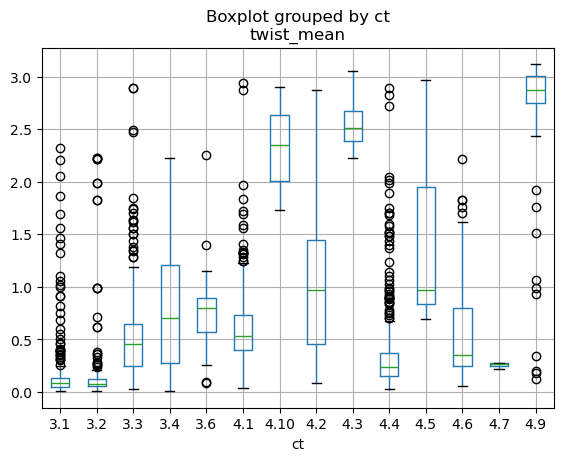

In [65]:
prot_data.boxplot(column='twist_mean',by='ct')

<Axes: title={'center': 'twist_std'}, xlabel='ct'>

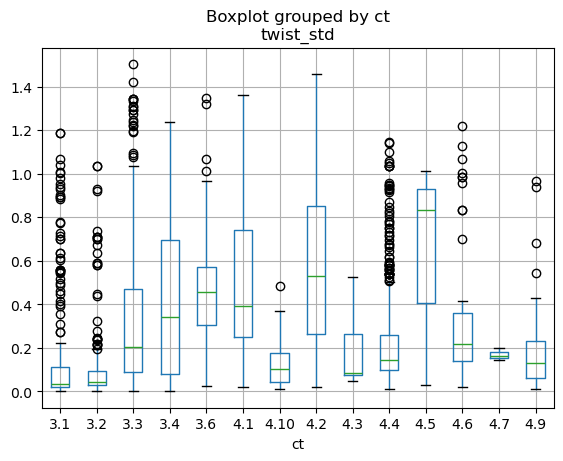

In [66]:
prot_data.boxplot(column='twist_std',by='ct')

#### Pitch

<Axes: title={'center': 'pitch_mean'}, xlabel='ct'>

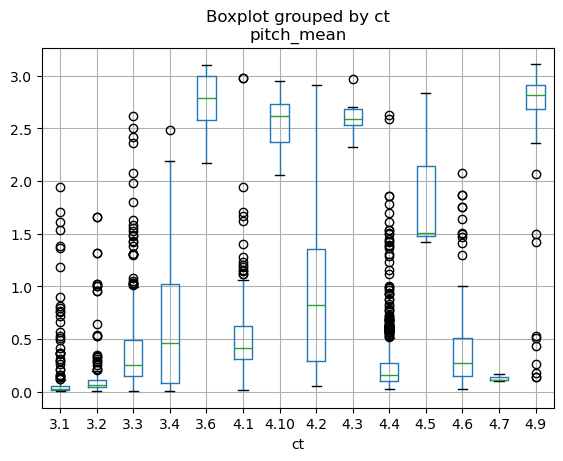

In [67]:
prot_data.boxplot(column='pitch_mean',by='ct')

<Axes: title={'center': 'pitch_std'}, xlabel='ct'>

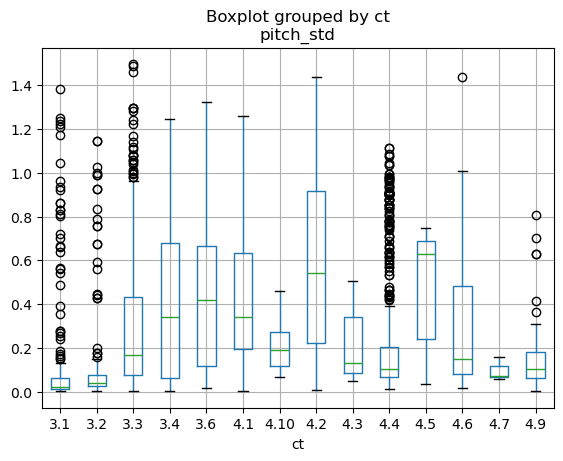

In [68]:
prot_data.boxplot(column='pitch_std',by='ct')

#### Handedness

<Axes: title={'center': 'handendness_mean'}, xlabel='ct'>

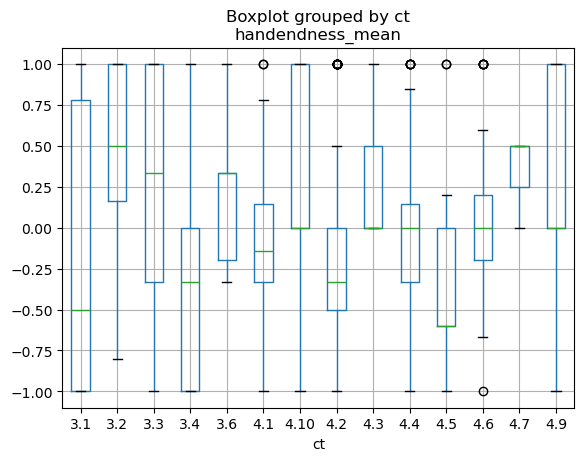

In [76]:
prot_data.boxplot(column='handendness_mean',by='ct')

### Mean TM-score VS standard deviations

Text(0.5, 1.0, 'TMscore mean VS twist std')

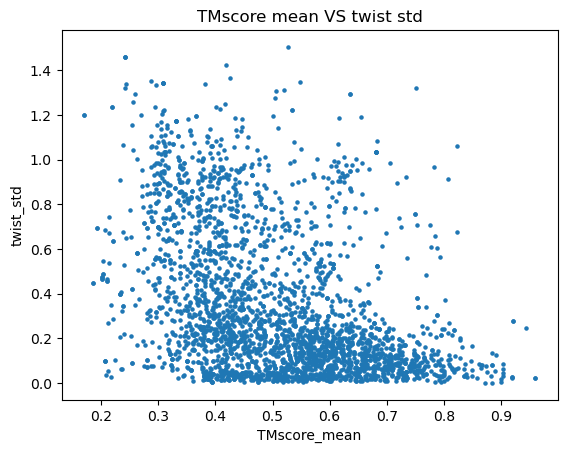

In [97]:
prot_data.plot.scatter(x='TMscore_mean',y='twist_std',s=5)
plt.title('TMscore mean VS twist std')

Text(0.5, 1.0, 'TMscore mean VS pitch std')

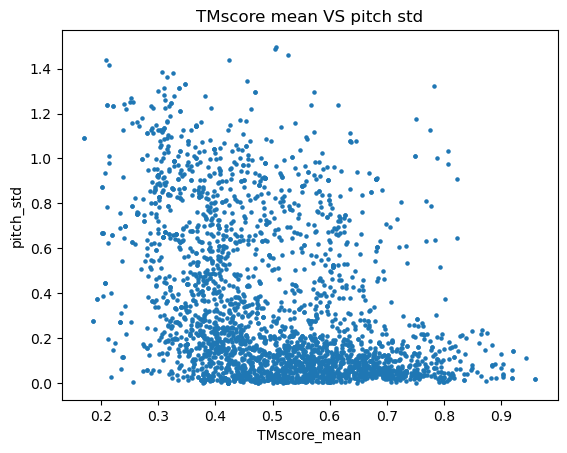

In [96]:
prot_data.plot.scatter(x='TMscore_mean',y='pitch_std',s=5)
plt.title('TMscore mean VS pitch std')

### Scatterplots of mean vs std

#### Curvature

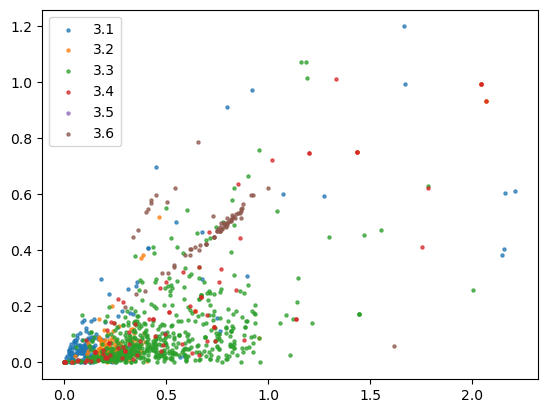

In [90]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['curvature_mean'],plot_data['curvature_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('Curvature mean vs std in open repeats')

Text(0.5, 1.0, 'Curvature mean vs std in closed repeats')

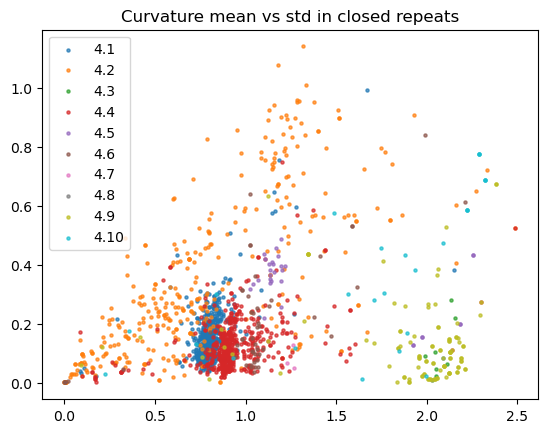

In [91]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['curvature_mean'],plot_data['curvature_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('Curvature mean vs std in closed repeats')

#### Twist

Text(0.5, 1.0, 'twist mean vs std in open repeats')

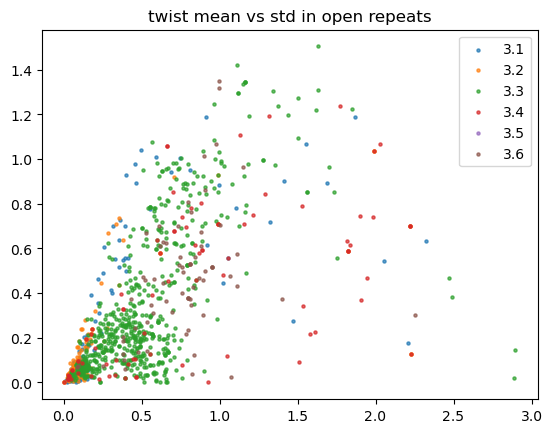

In [92]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['twist_mean'],plot_data['twist_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('twist mean vs std in open repeats')

Text(0.5, 1.0, 'twist mean vs std in closed repeats')

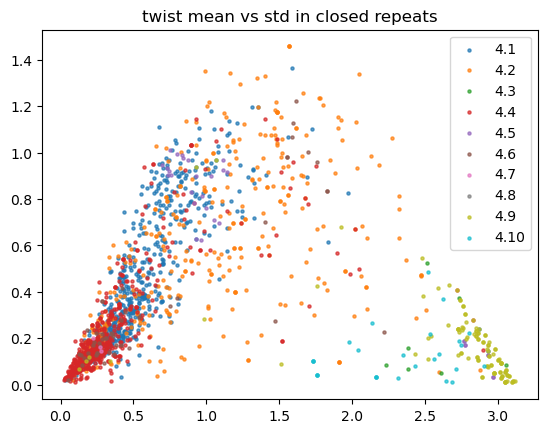

In [93]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['twist_mean'],plot_data['twist_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('twist mean vs std in closed repeats')

#### Pitch

Text(0.5, 1.0, 'pitch mean vs std in open repeats')

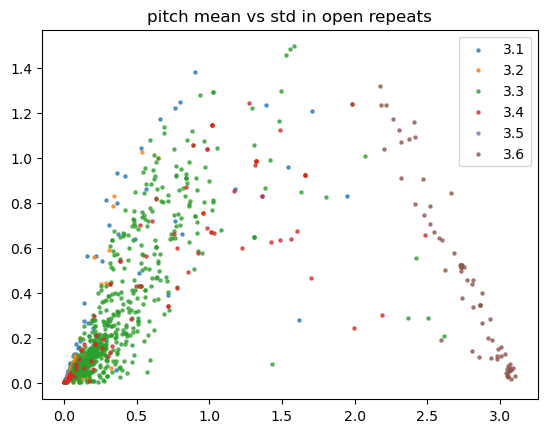

In [94]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['pitch_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('pitch mean vs std in open repeats')

Text(0.5, 1.0, 'pitch mean vs std in closed repeats')

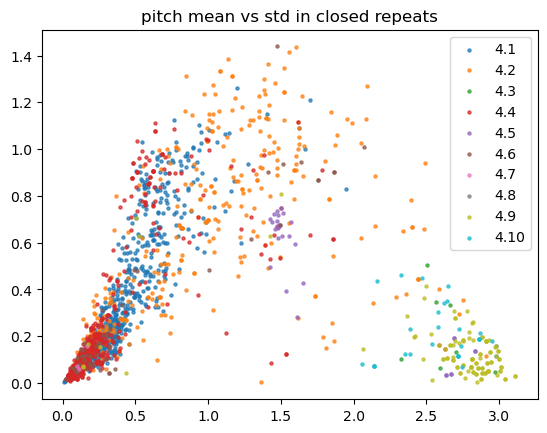

In [95]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['pitch_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('pitch mean vs std in closed repeats')

### Scatterplots of curvature vs twist vs pitch (means)

#### Curvature vs twist

Text(0.5, 1.0, 'curvature vs twist in open repeats')

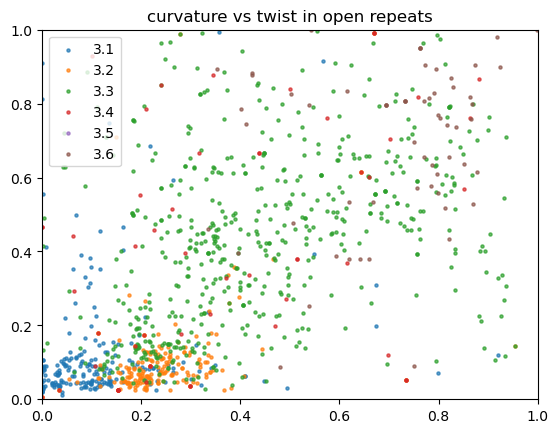

In [100]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['curvature_mean'],plot_data['twist_mean'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('curvature vs twist in open repeats')

Text(0.5, 1.0, 'curvature vs twist in closed repeats')

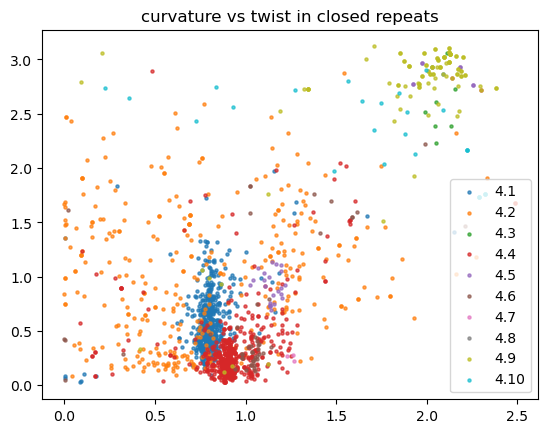

In [101]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['curvature_mean'],plot_data['twist_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('curvature vs twist in closed repeats')

#### Twist vs pitch

Text(0.5, 1.0, 'pitch vs twist in open repeats')

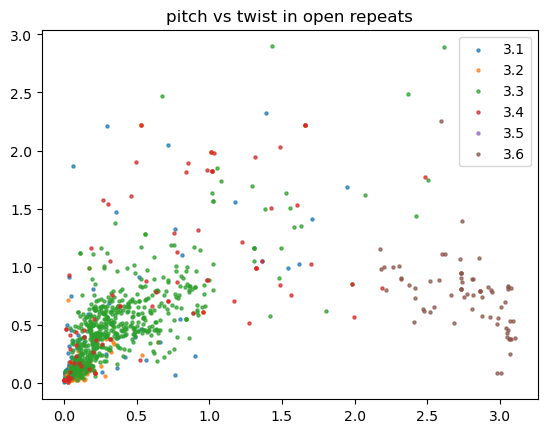

In [102]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['twist_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('pitch vs twist in open repeats')

Text(0.5, 1.0, 'pitch vs twist in closed repeats')

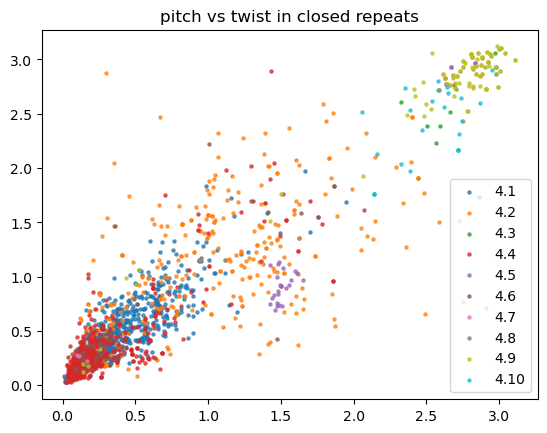

In [103]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['twist_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('pitch vs twist in closed repeats')

#### Curvature vs pitch

Text(0.5, 1.0, 'pitch vs curvature in open repeats')

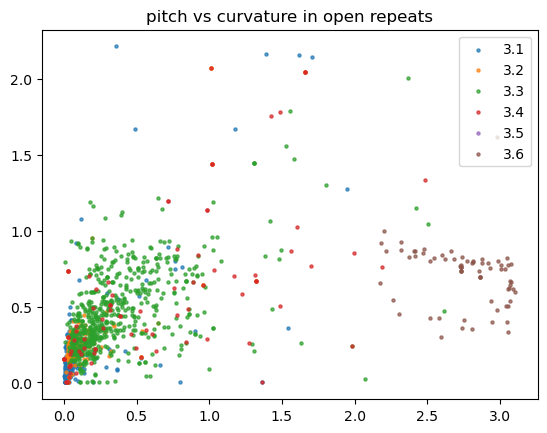

In [104]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['curvature_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('pitch vs curvature in open repeats')

Text(0.5, 1.0, 'pitch vs curvature in closed repeats')

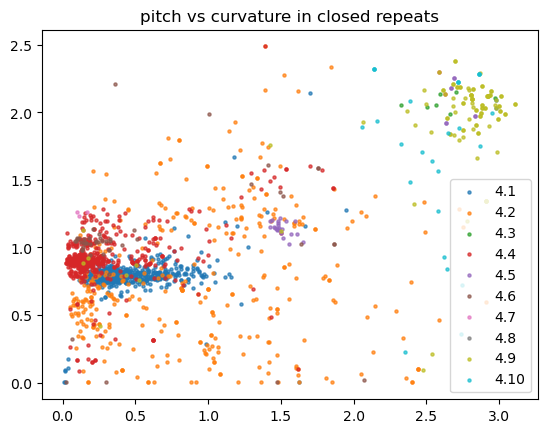

In [105]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['curvature_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('pitch vs curvature in closed repeats')